Importing Libraries

In [205]:
import numpy as npp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [206]:
# Dataset Overview
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [207]:
# Sanity Check
df.shape

(768, 9)

In [208]:
# Basic Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [209]:
# Checking for nulls
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [210]:
# Checking For Duplicates
df.duplicated().sum()

0

In [211]:
# Checking For Invalid Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


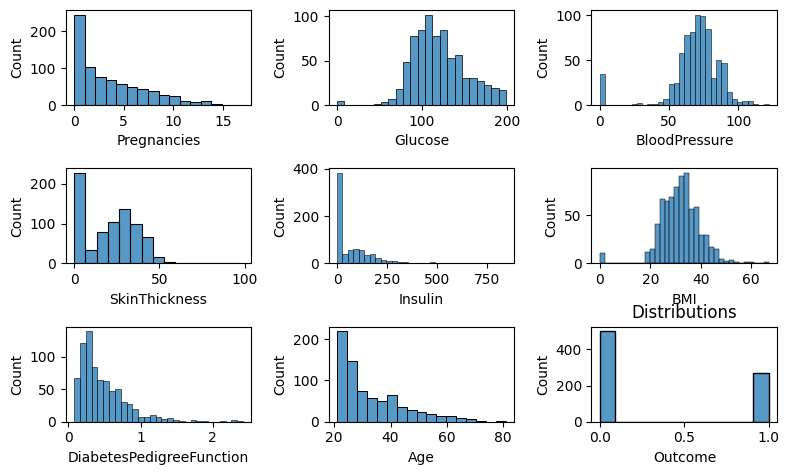

In [212]:
plt.figure(figsize = (8,6))
for i, col in enumerate(df):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col])
plt.tight_layout()
plt.title("Distributions")
plt.show()

In [229]:
# Removing Outliers
def remove_outliers_iqr(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

<Axes: >

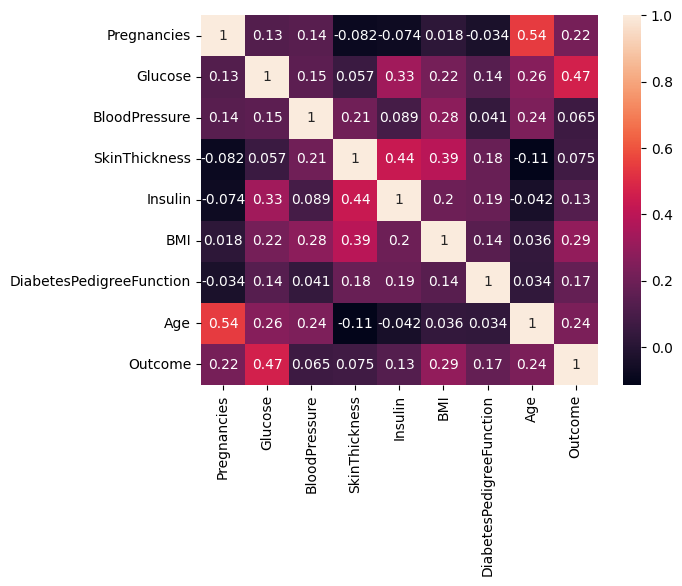

In [230]:
# Heatmap for possible relationship
correlation = df.corr()
sns.heatmap(correlation, annot = True)

<Figure size 800x400 with 0 Axes>

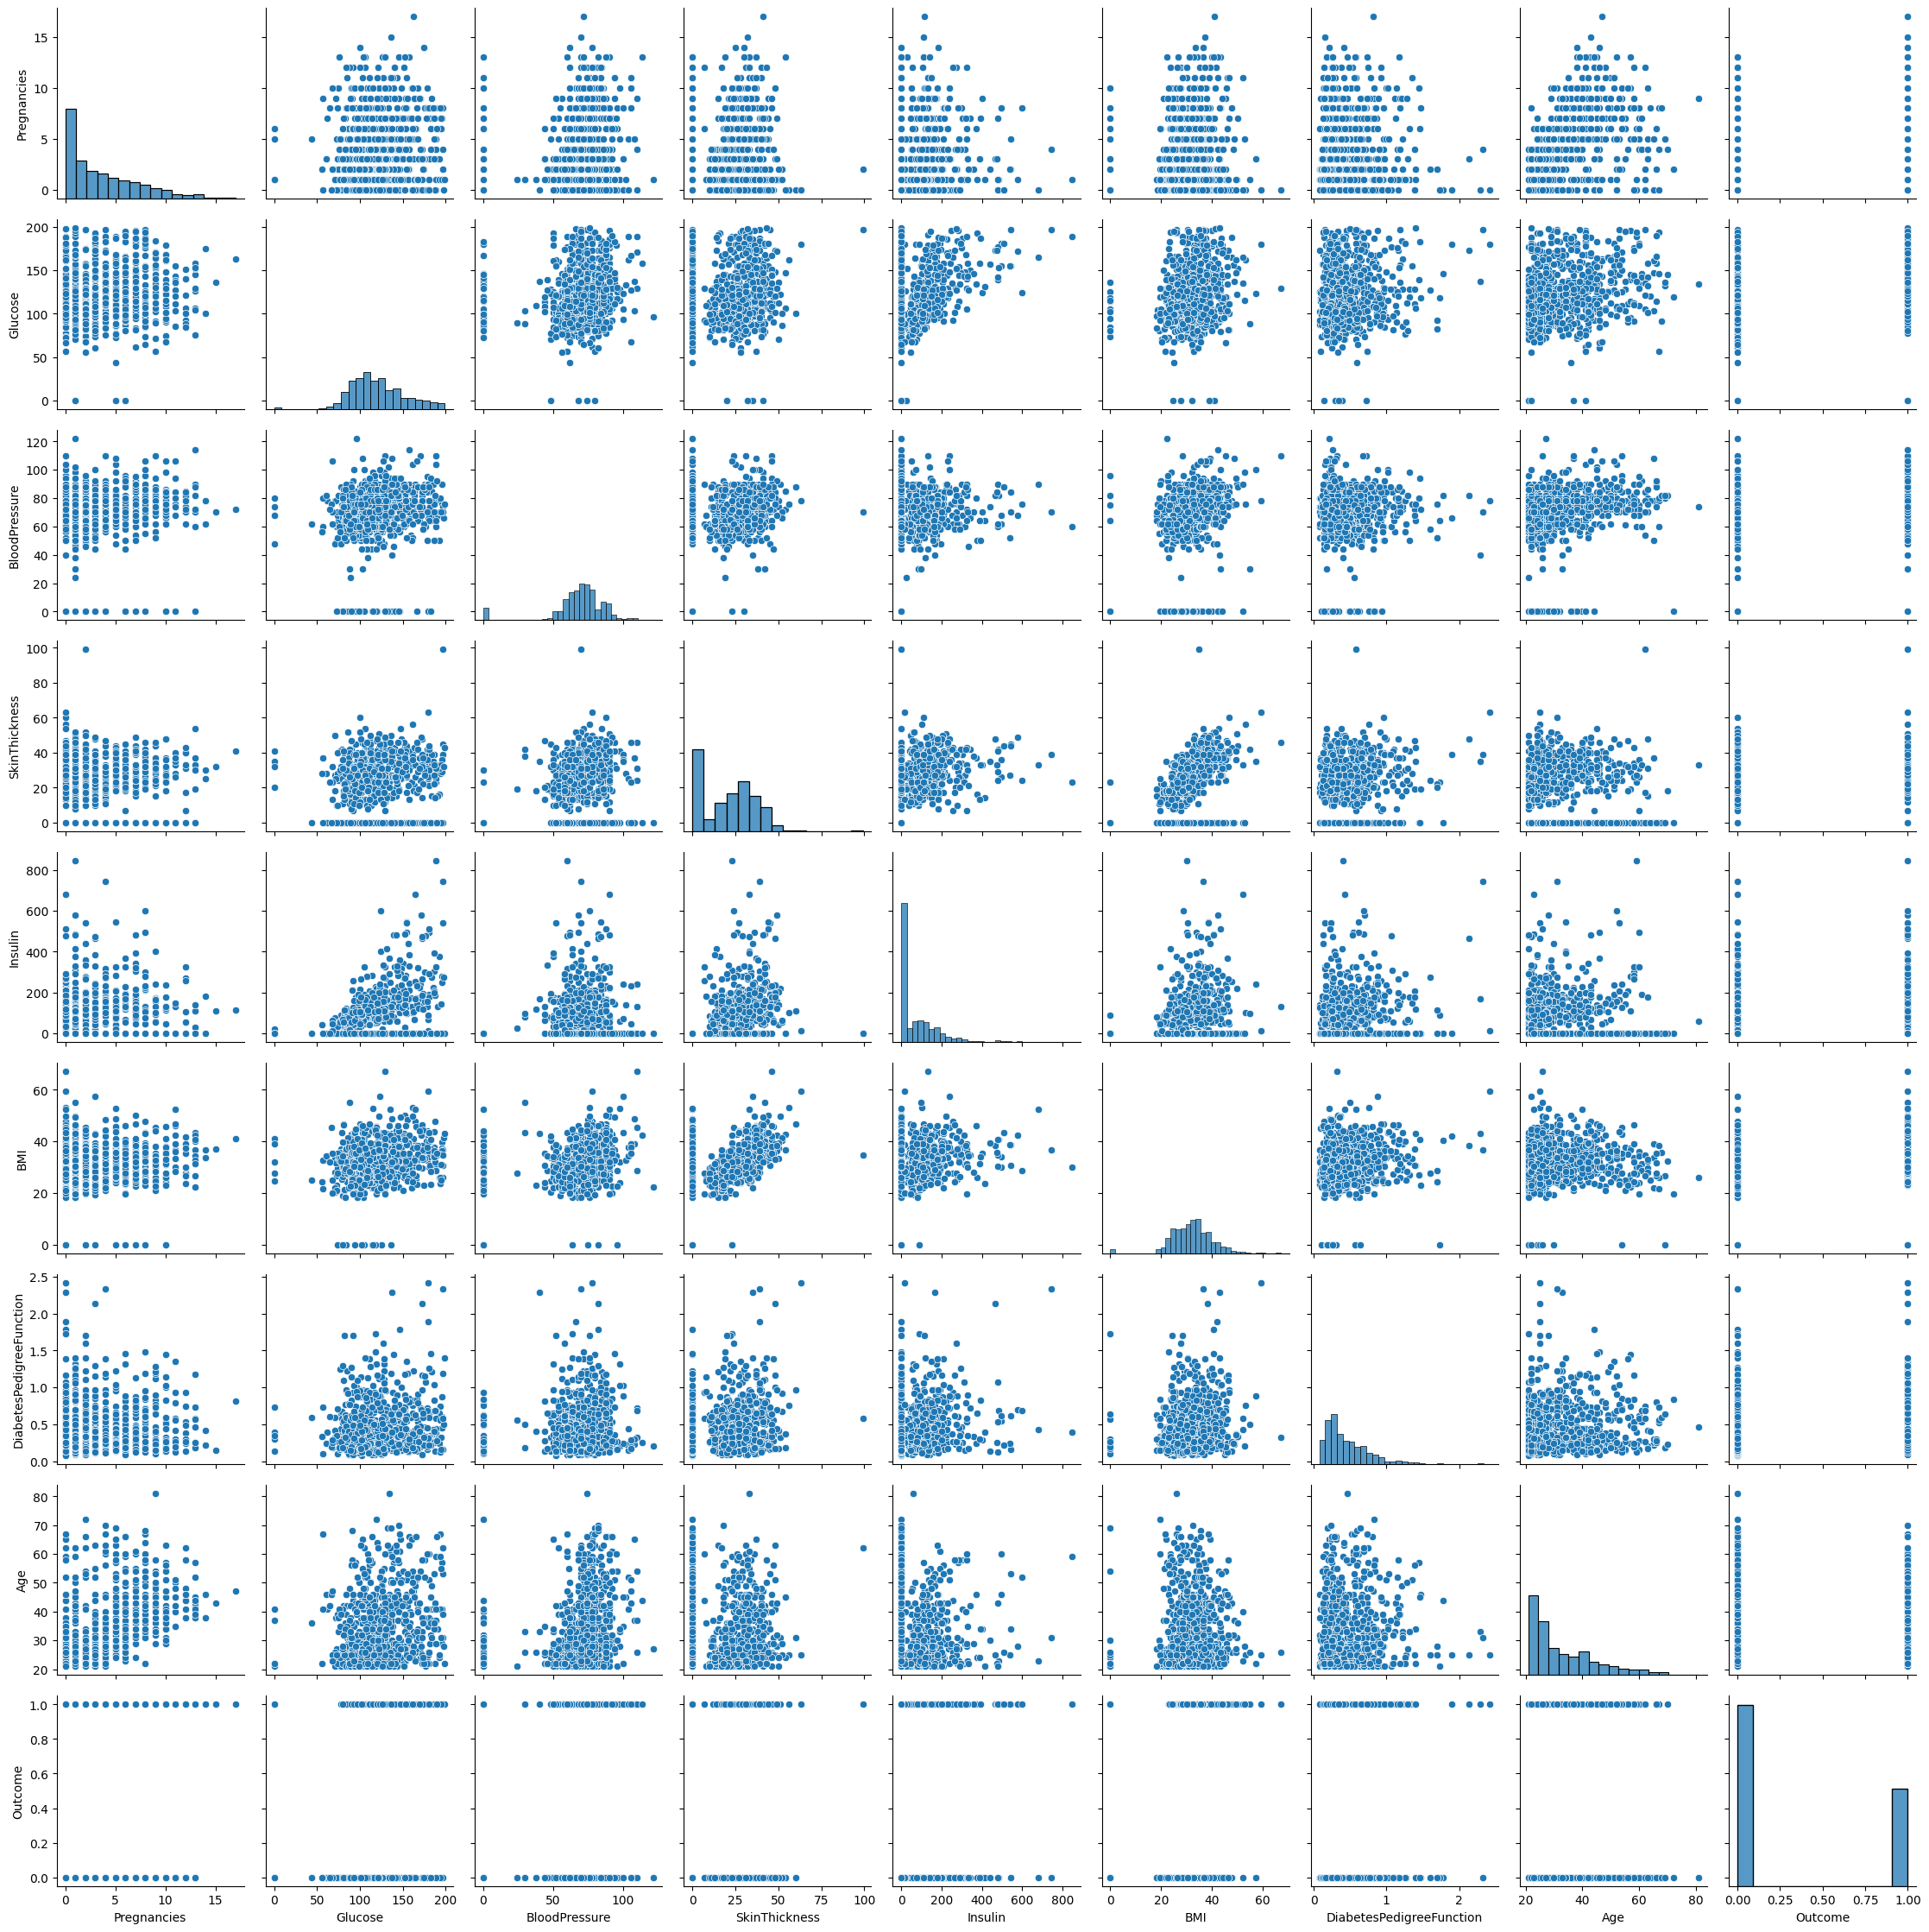

In [215]:
# Pair plot for detailed possible relationship
plt.figure(figsize = (8,4))
sns.pairplot(df)
plt.tight_layout()

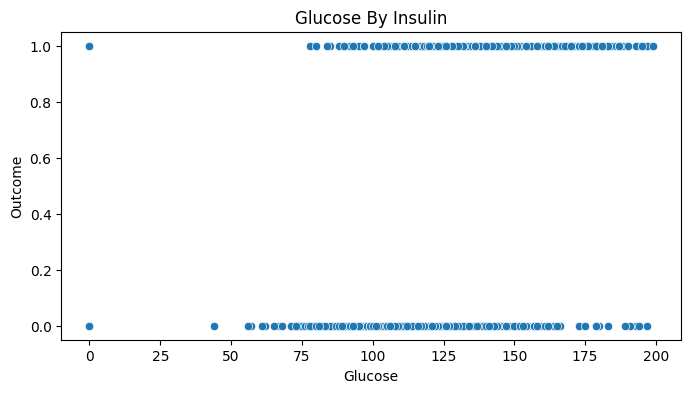

In [238]:
plt.figure(figsize = (8,4))
sns.scatterplot(df, x = 'Glucose', y = 'Outcome')
plt.title("Glucose By Insulin")
plt.show()

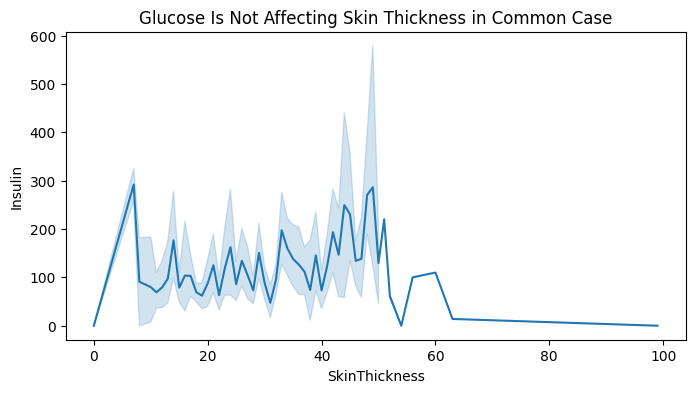

In [232]:
plt.figure(figsize = (8,4))
sns.lineplot(df, x = 'SkinThickness', y = 'Insulin')
plt.title("Glucose Is Not Affecting Skin Thickness in Common Case")
plt.show()

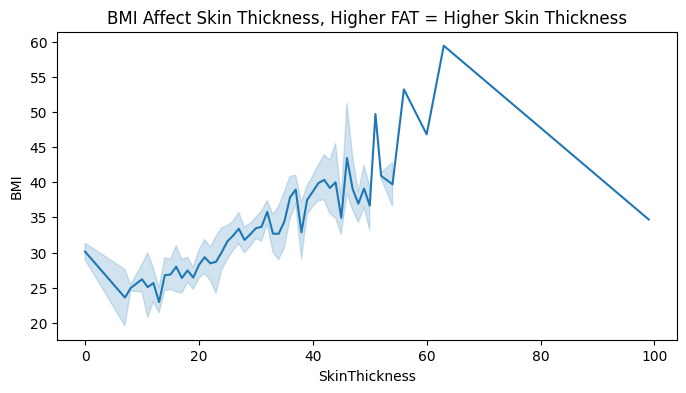

In [233]:
plt.figure(figsize = (8,4))
sns.lineplot(df, x = 'SkinThickness', y = 'BMI')
plt.title("BMI Affect Skin Thickness, Higher FAT = Higher Skin Thickness")
plt.show()

In [220]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [221]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [222]:
le = LogisticRegression()
le.fit(x_train_scaled, y_train)

LogisticRegression()

In [223]:
le_pred = le.predict(x_test_scaled)

In [224]:
print(confusion_matrix(y_test, le_pred))
print(classification_report(y_test, le_pred))

[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [225]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [226]:
rf_pred = rf.predict(x_test_scaled)

In [227]:
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test,rf_pred))

[[78 21]
 [19 36]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

